# ECG-based PUF

### 3.2 Data Pre Processing
Load the entire dataset and assign to variable ```dict_all_records```.

In [7]:
import numpy as np
db_name = "ecgiddb/"
dict_all_records = dict()
f = open(db_name + "RECORDS", "r")
for y in f.readlines():
    person = y.split("/")[0].strip()
    record = y.split("/")[1].strip()
    # The record cannot be duplicate, so we can safely insert it everytime, w/o checking
    if person not in dict_all_records:
        dict_all_records[person] = {record: np.fromfile(db_name + person + "/" + record + ".dat", dtype=np.int16)}
    else:
        dict_all_records[person].update({record: np.fromfile(db_name + person + "/" + record + ".dat", dtype=np.int16)})

Apply the filter to the entire dataset

In [8]:
from scipy import signal

cutoff_frequency = 20
order = 1
sampling_rate = 1000
b, a = signal.butter(order, cutoff_frequency / (sampling_rate / 2), btype='low')

dict_all_records_filtered = dict()
for person in dict_all_records:
    dict_all_records_filtered[person] = dict()
    for record in dict_all_records[person]:
        # Apply the filter to each ECG signal
        dict_all_records_filtered[person][record] = signal.filtfilt(b, a, dict_all_records[person][record])

Optional: print one sample to show the difference between base signal and filtered signal.

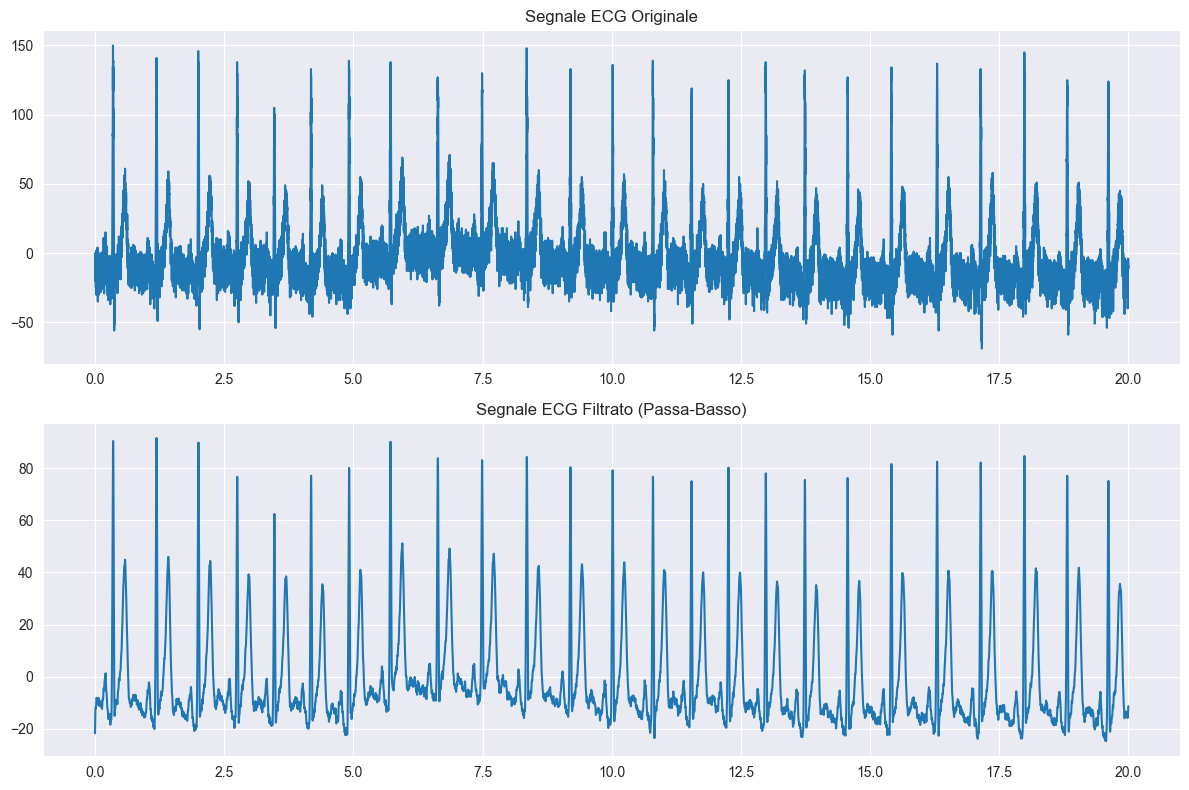

In [10]:
import matplotlib.pyplot as plt

duration = 20
time_axis = np.arange(0, duration, 1 / sampling_rate)
r = plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time_axis, dict_all_records['Person_01']['rec_2'])
plt.title('Segnale ECG Originale')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_axis, dict_all_records_filtered['Person_01']['rec_2'])
plt.title('Segnale ECG Filtrato (Passa-Basso)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.3 Feature Extraction

In this phase, we get the Filtered ECG and split the signal into single peaks.

In [15]:
from wfdb import processing
import wfdb

for person in dict_all_records_filtered:
    for record in dict_all_records_filtered[person]:
        try:
            current_record = wfdb.rdrecord(dict_all_records_filtered[person][record])
        except:
            print(person, record)


Person_01 rec_1
Person_01 rec_2
Person_01 rec_3
Person_01 rec_4
Person_01 rec_5
Person_01 rec_6
Person_01 rec_7
Person_01 rec_8
Person_01 rec_9
Person_01 rec_10
Person_01 rec_11
Person_01 rec_12
Person_01 rec_13
Person_01 rec_14
Person_01 rec_15
Person_01 rec_16
Person_01 rec_17
Person_01 rec_18
Person_01 rec_19
Person_01 rec_20
Person_02 rec_1
Person_02 rec_2
Person_02 rec_3
Person_02 rec_4
Person_02 rec_5
Person_02 rec_6
Person_02 rec_7
Person_02 rec_8
Person_02 rec_9
Person_02 rec_10
Person_02 rec_11
Person_02 rec_12
Person_02 rec_13
Person_02 rec_14
Person_02 rec_15
Person_02 rec_16
Person_02 rec_17
Person_02 rec_18
Person_02 rec_19
Person_02 rec_20
Person_02 rec_21
Person_02 rec_22
Person_03 rec_1
Person_03 rec_2
Person_03 rec_3
Person_03 rec_4
Person_03 rec_5
Person_04 rec_1
Person_04 rec_2
Person_05 rec_1
Person_05 rec_2
Person_06 rec_1
Person_06 rec_2
Person_07 rec_1
Person_07 rec_2
Person_08 rec_1
Person_08 rec_2
Person_09 rec_1
Person_09 rec_2
Person_09 rec_3
Person_09 rec_4
